 <h1 align="center">Find a car Park</h1>

 <h3 align="center">Authors: Noa Aizer & Ido Shapira & Shay Leyzerovich</h3>   

In this project we propose to develop a model for identifying whether there is free space in theparking lot image, or whether the parking is full.

# Report:

In [1]:
# TODO

## Code & Explanations:

### Import all the necessary libraries:
We have used Python libraries:
- tensorflow v1

In [2]:
import tensorflow.compat.v1 as tf
import cv2
import os
from tqdm import tqdm
import numpy as np
import random as rn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn import metrics


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### fix random seed:

In [3]:
# np.random.seed(42)
# rn.seed(42)
# tf.set_random_seed(42)

our original data set is 5 gb but in order to use it properly we had to take only half of it

(-decide how many data to take-)

### import the data:

In [4]:
X = []
Z = []
IMG_SIZE=150
FREE_DIR='C:/Users/USER/Desktop/Ariel University/שנה ג סמסטר א/למידה עמוקה ועיבוד שפות טבעיות/project/data/Free_half'
FULL_DIR='C:/Users/USER/Desktop/Ariel University/שנה ג סמסטר א/למידה עמוקה ועיבוד שפות טבעיות/project/data/Full_half_half'

In [5]:
def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR,img)
        img = plt.imread(path)
# #         img = cv2.imread(path)
#         img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))   # maybe we will get better result without resizing the images
        np_img=np.asarray(img)
        X.append(np_img)
        Z.append(str(label))

In [6]:
# make 'Free' data
make_train_data('Free',FREE_DIR)
print(len(X))

100%|██████████████████████████████████████████████████████████████████████████████████| 89/89 [00:03<00:00, 28.01it/s]

89


In [7]:
# make 'Full' data
make_train_data('Full',FULL_DIR)
print(len(X))

100%|██████████████████████████████████████████████████████████████████████████████████| 54/54 [00:02<00:00, 25.56it/s]

143


### The description of the data:

1. Number of instances: ---

2. Number of attributes: --- (type here what is the feature)

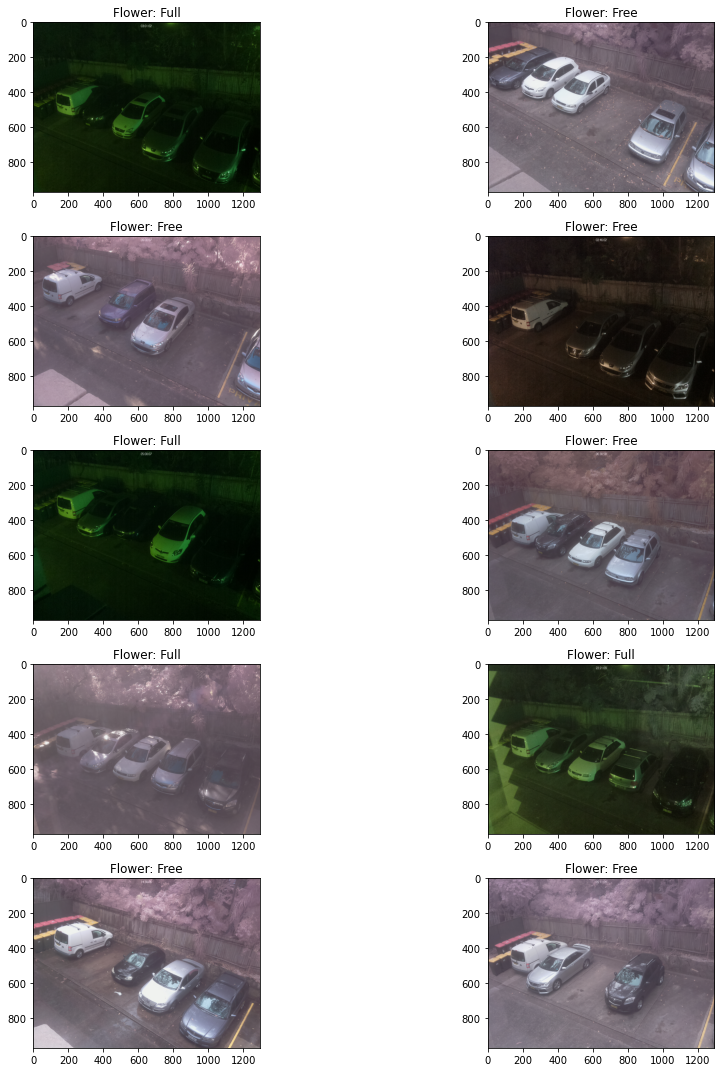

In [8]:
# check some image
fig,ax=plt.subplots(3,2)
fig.set_size_inches(15,15)
for i in range(3):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

### Label encoding of the target:
'Free' = 1

'Full' = 0

In [9]:
le=LabelEncoder()
Y=le.fit_transform(Z)
# Y = pd.Series(Z).replace({'Free':1,'Full':0},inplace=True)

### normalization and flatten the images:

In [10]:
# X = np.array([cv2.normalize(X[i], None, 0, 255, cv2.NORM_MINMAX) for i in range(len(X))]) # normalization maybe better
X=np.array(X)/255
X=np.array([X[i].flatten() for i in range(len(X))]) # flatten the images

In [11]:
df = pd.DataFrame(data=X) # we need this ?
df

,0,1,2,3,4,5,6,7,8,9,...,3779126,3779127,3779128,3779129,3779130,3779131,3779132,3779133,3779134,3779135
0,0.317647,0.270588,0.286275,0.298039,0.247059,0.274510,0.286275,0.235294,0.270588,0.301961,...,0.537255,0.403922,0.458824,0.509804,0.403922,0.466667,0.525490,0.400000,0.462745,0.525490
1,0.301961,0.231373,0.286275,0.294118,0.239216,0.290196,0.266667,0.227451,0.258824,0.286275,...,0.513725,0.439216,0.443137,0.513725,0.435294,0.427451,0.509804,0.443137,0.435294,0.521569
2,0.321569,0.235294,0.317647,0.294118,0.223529,0.286275,0.309804,0.239216,0.294118,0.313725,...,0.525490,0.435294,0.439216,0.509804,0.419608,0.431373,0.505882,0.427451,0.454902,0.525490
3,0.329412,0.223529,0.298039,0.325490,0.227451,0.301961,0.301961,0.211765,0.274510,0.298039,...,0.517647,0.423529,0.447059,0.501961,0.415686,0.454902,0.501961,0.403922,0.454902,0.490196
4,0.309804,0.200000,0.254902,0.298039,0.215686,0.274510,0.278431,0.223529,0.282353,0.278431,...,0.619608,0.509804,0.517647,0.600000,0.509804,0.521569,0.596078,0.494118,0.505882,0.580392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.474510,0.384314,0.423529,0.482353,0.392157,0.423529,0.494118,0.403922,0.435294,0.517647,...,0.623529,0.568627,0.619608,0.650980,0.619608,0.647059,0.709804,0.650980,0.658824,0.741176
139,0.427451,0.278431,0.360784,0.447059,0.298039,0.388235,0.439216,0.305882,0.400000,0.466667,...,0.278431,0.266667,0.247059,0.270588,0.282353,0.254902,0.286275,0.282353,0.243137,0.278431
140,0.125490,0.160784,0.086275,0.082353,0.125490,0.058824,0.043137,0.086275,0.019608,0.094118,...,0.000000,0.043137,0.074510,0.000000,0.035294,0.070588,0.000000,0.043137,0.090196,0.011765
141,0.200000,0.196078,0.250980,0.054902,0.062745,0.109804,0.082353,0.101961,0.117647,0.129412,...,0.047059,0.105882,0.101961,0.086275,0.074510,0.050980,0.050980,0.098039,0.039216,0.058824


In [12]:
X.shape

(143, 3779136)

### Train-Test Split:

We divide the set into two classes: 66% for training and 33% for testing. 
As we see we have a balancing problem- there much more patients with Non-recurrent than recurrent so we need to take it in account while spliting the data in order to have enough patients with recurrent in the training set but also to have some in the testing. 

(-Change this to our dataset-)

In [13]:
# Maybe put normolize here

In [14]:
# separate data
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

# freqs = pd.DataFrame({"Training dataset": [(y_train == 1).sum(),(y_train == -1).sum()],
#                       "Test dataset": [(y_test == 1).sum(),(y_test == -1).sum()],
#                       "Total": [(y_train == 1).sum()+(y_test == 1).sum(),(y_train == -1).sum()+(y_test == -1).sum()]},
#                      index=["Recurrent", "Nonrecurrent"])
# freqs[["Training dataset", "Test dataset", "Total"]]

### Begin building the Logistic-Regression model using tensorflow.v1:

1. Declare the variables that need to be learned and initialization.
   
   The number of variable is the number of the features (X.shape[1], 1)

In [15]:
tf.compat.v1.disable_eager_execution()
W = tf.Variable(tf.zeros(shape=[X.shape[1], 1])) # tf.random_normal maybe better
b = tf.Variable(tf.zeros(shape=[1, 1]))
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

2. Define placeholders

In [16]:
data = tf.placeholder(dtype=tf.float32, shape=[None, X.shape[1]])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

3. Declare the model you need to learn

In [17]:
mod = tf.matmul(data, W) + b

4. First, we declare the loss function.
    
    Then we use the sigmoid cross-entropy loss function,
    
    meaning, first doing a sigmoid on the model result and then using the cross-entropy loss function.

In [18]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

5. Define the requires parameters:
    - learning rate
    - batch_size
    - number of iteration

In [19]:
learning_rate = 0.003
batch_size = 30
iter_num = 1500

6. Define the optimizer

In [20]:
opt = tf.train.GradientDescentOptimizer(learning_rate)

7. Define the goal
    
   We want to minimize the loss function using the Gradient-Decent method

In [21]:
goal = opt.minimize(loss)

8. Define the accuracy

In [22]:
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)

### End of the definition of the model framework

In [23]:
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc = []

### Start training the  Logistic-Regression model:

In [ ]:
for epoch in range(iter_num):
    # Generate random batch index
    batch_index = np.random.choice(len(X_train), size=batch_size)
    batch_train_X = X_train[batch_index]
    batch_train_y = np.matrix(y_train[batch_index]).T
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = sess.run(accuracy, feed_dict={data: X_train, target: np.matrix(y_train).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: X_test, target: np.matrix(y_test).T})
    # recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    # output
    if (epoch + 1) % 300 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                          temp_train_acc, temp_test_acc))

# LogisticRegression using sklearn

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

#### Function for computing the confusing matrix:

In [ ]:
def cm_analysis(y_true, y_pred, labels, figsize=(7,6)):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = '0'
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap='Blues')
    #plt.savefig(filename)
    plt.show()

In [ ]:
pred, counts = np.unique(y_pred, return_counts=True)
dict(zip(pred, counts))

In [ ]:
cm_analysis(y_test, y_pred, log_reg.classes_)

In [ ]:
metrics.accuracy_score(y_test, y_pred)

In [ ]:
tf.compat.v1.disable_eager_execution()
eps = 1e-12
x = tf.placeholder(tf.float32, [None, X.shape[1]])
y_ = tf.placeholder(tf.float32, [None, 1])

# init w,b,y (y=h(x))

In [ ]:
W = tf.Variable(tf.zeros([X.shape[1],1]))
b = tf.Variable(tf.zeros([1]))
# y = 1 / (1.0 + tf.nn.sigmoid(tf.matmul(x,W) + b))
y = 1 / (1.0 + tf.exp(-(tf.matmul(x,W) + b)))

# define the loss function

In [ ]:
loss1 = -(y_ * tf.log(y + eps) + (1 - y_) * tf.log( 1 - y + eps))
loss = tf.reduce_mean(loss1)
update = tf.train.GradientDescentOptimizer(0.00001).minimize(loss)
# data_x = np.array([convert2vec(data[0]), convert2vec(data[1]), convert2vec(data[2]), convert2vec(data[3])])
data_x = X_train
# data_y = np.array([[1],[1],[0],[0]])
data_y = y_train

# train the model

In [ ]:
data_y = data_y.reshape(data_y.shape[0], 1)

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(0,100):
    sess.run(update, feed_dict = {x:data_x, y_:data_y}) #BGD

# test the model

In [ ]:
def logistic_fun(z):
    return 1/(1.0 + np.exp(-z))
    
#pdb.set_trace()
# print('Prediction for: "' + '"', logistic_fun(np.matmul(X_test[0],sess.run(W)) + sess.run(b))[0][0])
print('Prediction for: "' + '"', logistic_fun(np.matmul(X_test[0],sess.run(W)) + sess.run(b)))
print('Prediction for: "' + '"', logistic_fun(np.matmul(X_test[23],sess.run(W)) + sess.run(b)))
